# 대전 코로나 19 발병 현황에 대한 EDA    

1. 일자별, 연령별, 성별, 거주지별 구분
2. 확진일자와 완치일자 비교를 통한 평균 완치 소요일 추정
3. 접촉 유형 분류


In [2]:
import webbrowser
import urllib.request
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':

    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    #한글 폰트 깨짐 방지

In [4]:
from collections import Counter

In [5]:
url='https://www.daejeon.go.kr/corona19/index.do?menuId=0002'

In [6]:
html_coros=requests.get(url).text
soup_coros=BeautifulSoup(html_coros, 'lxml')

In [8]:
html_coros

'\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n \r\n\r\n<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n<meta charset="utf-8">\r\n<meta name="viewport" content="width=device-width, initial-scale=1">\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="keywords" content="대전광역시 코로나19" />\r\n<meta name="description" content="대전광역시, 코로나19">\r\n\r\n<script type="text/javascript" src="/corona19/js/drh/layout/jquery-1.11.3.min.js"></script>\r\n<script type="text/javascript" src=\'/corona19/js/cmm/commonUtil.js\'></script>\r\n<script type="text/javascript" src=\'/corona19/js/cmm/stringUtil.js\'></script>\r\n<script type="text/javascript" src="/corona19/js/cmm/system_util.js" ></script>\r\n<script type="text/javascript" src="/corona19/js/cmm/system_board.js"></script>\r\n\r\n<script type="text/javascript" src="/corona19/js/drh/layout/jquery.bxslider.min.js"></script>\r\n<script type="text/javascript" src="/corona19/js/cmm/jquery.form.min.js"></script>\r\n<script type="text/javascript" src

In [10]:
soup_coros

<!DOCTYPE html>
<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="대전광역시 코로나19" name="keywords"/>
<meta content="대전광역시, 코로나19" name="description"/>
<script src="/corona19/js/drh/layout/jquery-1.11.3.min.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/commonUtil.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/stringUtil.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/system_util.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/system_board.js" type="text/javascript"></script>
<script src="/corona19/js/drh/layout/jquery.bxslider.min.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/jquery.form.min.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/html5shiv.js" type="text/javascript"></script>
<script src="/corona19/js/drh/common.js" type="text/ja

In [11]:
coros=soup_coros.select('td ')

In [12]:
coros[0:10]

[<td rowspan="1" style="width: 98px; height: 18px;">
 <p>101<br/></p></td>,
 <td rowspan="1" style="width: 141px; height: 18px;">
 <p>미채번<br/></p></td>,
 <td rowspan="1" style="width: 141px; height: 18px;">
 <p>6.25<br/></p></td>,
 <td rowspan="1" style="width: 213px; height: 18px;">
 <p>여(50대)<br/></p></td>,
 <td rowspan="1" style="width: 213px; height: 18px;">
 <p>서구<br/></p></td>,
 <td rowspan="1" style="width: 242px; height: 18px;">
 <p>대전86번 확진자의 접촉자<br/></p></td>,
 <td rowspan="1" style="width: 285px; height: 18px;">
 <p>충남대병원 입원(6.25)<br/></p></td>,
 <td rowspan="1" style="width: 98px; height: 9px;">
 <p>100<br/></p></td>,
 <td rowspan="1" style="width: 141px; height: 20px;">
 <p>미채번<br/></p></td>,
 <td rowspan="1" style="width: 141px; height: 20px;">
 <p>6.24<br/></p></td>]

In [13]:
coros[1].get_text()

'\n미채번'

In [14]:
coros[0:10]

[<td rowspan="1" style="width: 98px; height: 18px;">
 <p>101<br/></p></td>,
 <td rowspan="1" style="width: 141px; height: 18px;">
 <p>미채번<br/></p></td>,
 <td rowspan="1" style="width: 141px; height: 18px;">
 <p>6.25<br/></p></td>,
 <td rowspan="1" style="width: 213px; height: 18px;">
 <p>여(50대)<br/></p></td>,
 <td rowspan="1" style="width: 213px; height: 18px;">
 <p>서구<br/></p></td>,
 <td rowspan="1" style="width: 242px; height: 18px;">
 <p>대전86번 확진자의 접촉자<br/></p></td>,
 <td rowspan="1" style="width: 285px; height: 18px;">
 <p>충남대병원 입원(6.25)<br/></p></td>,
 <td rowspan="1" style="width: 98px; height: 9px;">
 <p>100<br/></p></td>,
 <td rowspan="1" style="width: 141px; height: 20px;">
 <p>미채번<br/></p></td>,
 <td rowspan="1" style="width: 141px; height: 20px;">
 <p>6.24<br/></p></td>]

In [15]:
coros_address=[coros_element.get_text() for coros_element in coros [0:] ]

In [21]:
coros_address

['\n101',
 '\n미채번',
 '\n6.25',
 '\n여(50대)',
 '\n서구',
 '\n대전86번 확진자의 접촉자',
 '\n충남대병원 입원(6.25)',
 '\n100',
 '\n미채번',
 '\n6.24',
 '\n여(50대)',
 '\n중구',
 '\n대전86번 확진자의 접촉자',
 '\n충남대병원 입원(6.25)',
 '\n99',
 '\n미채번',
 '\n6.24',
 '\n여(80대)',
 '\n서구',
 '\n열매노인요양원',
 '\n충남대병원 입원(6.25)',
 '\n98',
 '\n12560',
 '\n6.24',
 '\n남(50대)',
 '\n유성구',
 '\n대전60번 확진자의 접촉자',
 '\n충남대병원 입원(6.25)',
 '\n97',
 '\n12559',
 '\n6.24',
 '\n여(50대)',
 '\n유성구',
 '\n대전92번 확진자의 접촉자',
 '\n충남대병원 입원(6.25)',
 '\n96',
 '\n12541',
 '\n6.24',
 '\n여(60대)',
 '\n서구',
 '\n대한토지법인 콜센터',
 '\n충남대병원 입원(6.24)',
 '\n95',
 '\n12540',
 '\n6.24',
 '\n여(50대)',
 '\n서구',
 '\n대전86번 확진자의 접촉자',
 '\n충남대병원 입원(6.24)',
 '\n94',
 '\n12531',
 '\n6.24',
 '\n여(50대)',
 '\n서구',
 '\n대전86번 확진자의 가족',
 '\n충남대병원 입원(6.24)',
 '\n93',
 '\n12532',
 '\n6.24',
 '\n여(50대)',
 '\n서구',
 '\n오렌지타운',
 '\n충남대병원 입원(6.24)',
 '\n92',
 '\n12533',
 '\n6.23',
 '\n남(60대)',
 '\n유성구',
 '\n둔산전자타운',
 '\n충남대병원 입원(6.24)',
 '\n91',
 '\n12521',
 '\n6.23',
 '\n남(70대)',
 '\n유성구',
 '\n둔산전자타운',
 '

어드레스는 단순한 변수명이 아님. 꼭 제대로 맞춰서 쓸 것. \n문제는 어드레스 변수를 안 써서 생긴 문제이니 차후에 할 때는 주의할 것.

In [22]:

n=7
result=[coros_address[i *n:(i+1)*n]for i in range((len(coros_address)+n-1)//n)]

print(result)

[['\n101', '\n미채번', '\n6.25', '\n여(50대)', '\n서구', '\n대전86번 확진자의 접촉자', '\n충남대병원 입원(6.25)'], ['\n100', '\n미채번', '\n6.24', '\n여(50대)', '\n중구', '\n대전86번 확진자의 접촉자', '\n충남대병원 입원(6.25)'], ['\n99', '\n미채번', '\n6.24', '\n여(80대)', '\n서구', '\n열매노인요양원', '\n충남대병원 입원(6.25)'], ['\n98', '\n12560', '\n6.24', '\n남(50대)', '\n유성구', '\n대전60번 확진자의 접촉자', '\n충남대병원 입원(6.25)'], ['\n97', '\n12559', '\n6.24', '\n여(50대)', '\n유성구', '\n대전92번 확진자의 접촉자', '\n충남대병원 입원(6.25)'], ['\n96', '\n12541', '\n6.24', '\n여(60대)', '\n서구', '\n대한토지법인 콜센터', '\n충남대병원 입원(6.24)'], ['\n95', '\n12540', '\n6.24', '\n여(50대)', '\n서구', '\n대전86번 확진자의 접촉자', '\n충남대병원 입원(6.24)'], ['\n94', '\n12531', '\n6.24', '\n여(50대)', '\n서구', '\n대전86번 확진자의 가족', '\n충남대병원 입원(6.24)'], ['\n93', '\n12532', '\n6.24', '\n여(50대)', '\n서구', '\n오렌지타운', '\n충남대병원 입원(6.24)'], ['\n92', '\n12533', '\n6.23', '\n남(60대)', '\n유성구', '\n둔산전자타운', '\n충남대병원 입원(6.24)'], ['\n91', '\n12521', '\n6.23', '\n남(70대)', '\n유성구', '\n둔산전자타운', '\n충남대병원 입원(6.23)'], ['\n90', '\n12499', '\n6.23', '\n여(

# 각 항목 설명   
대전은 대전 지역에서 감염이 확인된 확진자들의 넘버링이다.   
질본은 전국 데이터에서 등록된 해당 확진자들의 넘버링을 뜻한다.   
확진일자는 감염 의심자의 감염이 최종적으로 확진된 일자를 말한다.   
성별(연령대)는 해당 확진자의 인적 정보를 뜻한다.   
거주지는 해당 확진자의 거주 지역을 뜻한다.   
접촉력은 해당 확진자의 감염 경로를 뜻한다.   
조치사항은 해당 확진자의 완치 여부 및 수용 현황을 뜻한다.   

In [23]:
#coros_columns=soup_coros.select('th').get_text()

In [24]:
coros_chart_d={'대전 확진자': result}
df=pd.DataFrame(result, columns=['대전','질본','확진일자','성별(연령대)','거주지','접촉력','조치사항'],
               index=range(1,len(result)+1))
df

,대전,질본,확진일자,성별(연령대),거주지,접촉력,조치사항
1,\n101,\n미채번,\n6.25,\n여(50대),\n서구,\n대전86번 확진자의 접촉자,\n충남대병원 입원(6.25)
2,\n100,\n미채번,\n6.24,\n여(50대),\n중구,\n대전86번 확진자의 접촉자,\n충남대병원 입원(6.25)
3,\n99,\n미채번,\n6.24,\n여(80대),\n서구,\n열매노인요양원,\n충남대병원 입원(6.25)
4,\n98,\n12560,\n6.24,\n남(50대),\n유성구,\n대전60번 확진자의 접촉자,\n충남대병원 입원(6.25)
5,\n97,\n12559,\n6.24,\n여(50대),\n유성구,\n대전92번 확진자의 접촉자,\n충남대병원 입원(6.25)
...,...,...,...,...,...,...,...
97,5,1252,2.26,남(30대),유성,,완치(3.9)
98,4,1256,2.26,여(40대),유성,,완치(3.2)
99,3,573,2.23,남(60대),유성,대전 2번 접촉자,완치(5.5)
100,2,372,2.22,여(60대),유성,,완치(3.28)


대전시 코로나 19관련 

해당 데이터 프레임에서 발생한 \n을 지우기 위해 아래와 같은 스크립트르를 입력하였다.

In [25]:
df[ '대전' ] = df[ '대전' ].str.replace( '\\n', '' )
df[ '질본' ] = df[ '질본' ].str.replace( '\\n', '' )
df[ '확진일자' ] = df[ '확진일자' ].str.replace( '\\n', '' )
df[ '성별(연령대)' ] = df[ '성별(연령대)' ].str.replace( '\\n', '' )
df[ '거주지' ] = df[ '거주지' ].str.replace( '\\n', '' )
df[ '접촉력' ] = df[ '접촉력' ].str.replace( '\\n', '' )
df[ '조치사항' ] = df[ '조치사항' ].str.replace( '\\n', '' )
df

,대전,질본,확진일자,성별(연령대),거주지,접촉력,조치사항
1,101,미채번,6.25,여(50대),서구,대전86번 확진자의 접촉자,충남대병원 입원(6.25)
2,100,미채번,6.24,여(50대),중구,대전86번 확진자의 접촉자,충남대병원 입원(6.25)
3,99,미채번,6.24,여(80대),서구,열매노인요양원,충남대병원 입원(6.25)
4,98,12560,6.24,남(50대),유성구,대전60번 확진자의 접촉자,충남대병원 입원(6.25)
5,97,12559,6.24,여(50대),유성구,대전92번 확진자의 접촉자,충남대병원 입원(6.25)
...,...,...,...,...,...,...,...
97,5,1252,2.26,남(30대),유성,,완치(3.9)
98,4,1256,2.26,여(40대),유성,,완치(3.2)
99,3,573,2.23,남(60대),유성,대전 2번 접촉자,완치(5.5)
100,2,372,2.22,여(60대),유성,,완치(3.28)


In [26]:
#데이터 프레임 만들고 해결하는 거라면 아래 식으로 해결. \의 경우 \\여야만 인식한다고 함

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 1 to 101
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   대전       101 non-null    object
 1   질본       101 non-null    object
 2   확진일자     101 non-null    object
 3   성별(연령대)  101 non-null    object
 4   거주지      101 non-null    object
 5   접촉력      101 non-null    object
 6   조치사항     101 non-null    object
dtypes: object(7)
memory usage: 5.7+ KB


# 일자별 확진자 발생 추이

In [28]:
df['확진일자'].unique()

array(['6.25', '6.24', '6.23', '6.22', '6.20', '6.19', '6.18', '6.17',
       '6.16', '6.15', '5.30', '5.22', '5.16', '5.11', '5.6', '4.21',
       '4.5', '4.4', '3.30', '3.28', '3.26', '3.25', '3.24', '3.21',
       '3.12', '3.11', '3.4', '3.3', '3.1', '2.28', '2.27', '2.26',
       '2.23', '2.22', '2.21'], dtype=object)

In [29]:
df['확진일자'].value_counts()
a=df['확진일자'].value_counts().sort_index()

대전에서의 최초 확진자는 2월 21일에 발생하였다. 기간동안 일자별 확진자 발생추이는 아래와 같다.

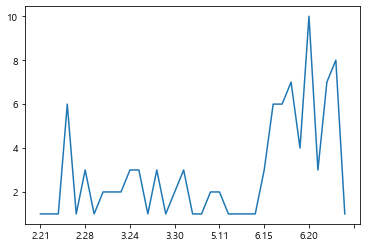

In [30]:
a.plot()

전반적으로 낮은 추세를 유지하던 그래프는 6월 15일을 기점으로 급격히 상승, 증가하는 추세를 유지하고 있다. 6월 15일 이후의 감염은 주로 교회 같은 특정 장소에서 발생하였다. 

# 확진자별 거주지역 통계

In [31]:
df['거주지'].value_counts()
b=df['거주지'].value_counts()
b_df=pd.DataFrame(b)
b_df

,거주지
서구,38
유성구,35
중구,10
유성,5
동구,4
대덕구,3
세종시,2
서울 (동구에 포함),1
공주 (서구에 포함),1
수원,1


거주지별 확진자 분포는 다음과 같다. 서구와 유성구가 제일 많은 수치를 기록하고 있는 것으로 나타났다.

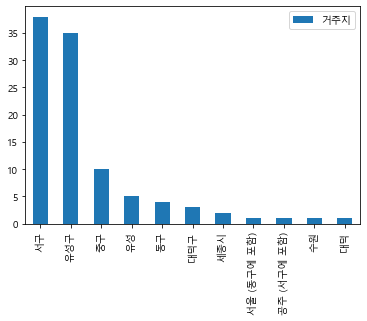

In [32]:
b_df.plot(kind='bar')

In [ ]:
#파이로 하고 싶은데 모르것다...

In [ ]:
#b_df[ 'count' ] = 1
#b_df = b_df.groupby( '거주지' ).sum()   


In [ ]:
#plt.style.use('default')   # 스타일 서식 지정

# 제조국가(origin) 값을 실제 지역명으로 변경
#df_origin.index = [ 'USA', 'EU', 'JAPAN' ]

# 제조국가(origin) 열에 대한 파이 차트 그리기 – count 열 데이터 사용
#df_origin[ 'count' ].plot( kind = 'pie', 
#                           figsize = ( 7, 5 ),
#                           autopct = '%1.1f%%',   # 퍼센트 % 표시 형식.
#                           startangle = 10,       # 파이 조각을 나누는 시작점(각도 표시)
#                           colors = [ 'chocolate', 'bisque', 'cadetblue' ]    # 색상 리스트
#                         )

#plt.title( 'Model Origin', size = 20 )
#plt.axis( 'equal' )    # 파이 차트의 비율을 같게 (원에 가깝게) 조정
#plt.legend( labels = df_origin.index, loc = 'upper right' )   # 범례 표시

#plt.show()

# 성별 확진자 비교

In [57]:
sex=df['성별(연령대)'].value_counts()
sex

여(50대)         18
여(60대)         17
여(20대)         10
남(50대)         10
남(60대)         10
남(20대)          6
여(40대)          6
남(30대)          6
여(70대)          5
남(70대)          3
남(10대)          3
남(80대)          2
여(10대)          1
남(40대)          1
남(20대, 외국인)     1
여(80대)          1
여(90대)          1
Name: 성별(연령대), dtype: int64

In [67]:
type(sex)

pandas.core.series.Series

In [55]:
sex_df=pd.DataFrame(sex)
sex_df

,성별(연령대)
여(50대),18
여(60대),17
여(20대),10
남(50대),10
남(60대),10
남(20대),6
여(40대),6
남(30대),6
여(70대),5
남(70대),3


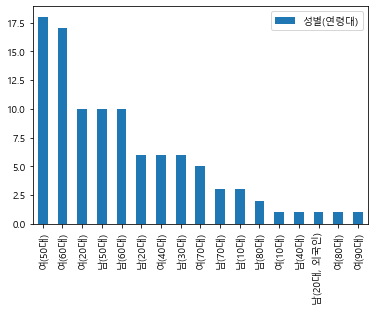

In [58]:
sex_df.plot(kind='bar')

In [69]:
sex_df.filter(like='남', axis=1)

""
여(50대)
여(60대)
여(20대)
남(50대)
남(60대)
남(20대)
여(40대)
남(30대)
여(70대)
남(70대)


In [70]:
print(sex_df.filter(like='남').columns)

Index([], dtype='object')


# 연령별 확진자 비교

# 접촉유형 비교

In [71]:
df['접촉력'].value_counts().head(5)
en=df['접촉력'].value_counts().head(5)

                  15
해외입국자             14
둔산전자타운            13
오렌지타운(사무실)         6
대전86번 확진자의 접촉자     3
꿈꾸는 교회             3
힐링랜드               3
바른몸의원              2
대전 5번 접촉자          2
서들경헤어샵             2
가거라통증아 카페          2
서산 8번 접촉자          2
자연힐링건강센타           2
계룡산온천찜질방           2
열매노인요양원            2
심층 역학조사중           2
대전 25번 접촉자         1
재확진 완치             1
관악구 별별코인노래방 추정     1
대전83번 가족           1
대구31번 접촉자          1
대전 30번 접촉자         1
대전 2번 접촉자          1
대전 49번 확진자의 가족     1
대전92번 확진자의 접촉자     1
대구 신천지 교육생         1
대전86번 확진자의 가족      1
옛날보리밥집             1
대전60번 확진자의 접촉자     1
대전 19번 접촉자         1
재확진                1
대전 27번 접촉자         1
대전 23번 접촉자         1
경하온천호텔(남성사우나)      1
자연건강힐링센타           1
오렌지타운              1
경북 상주(포도밭)         1
대전 11번 접촉자         1
카페가비               1
대전 6번 접촉자          1
역학조사중              1
대한토지법인 콜센터         1
Name: 접촉력, dtype: int64

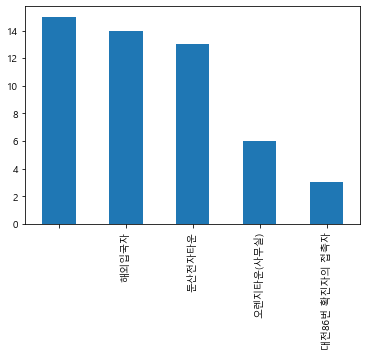

In [63]:
en.plot(kind='bar')

경로 불명을 제외하면 해외 입국자와 특정 감염원에서 주로 확진자가 발생했음을 알 수 있다. 